## Постановка задачи

15 апреля 1912 года, во время своего первого рейса, широко известный как “непотопляемый” "Титаник" затонул после столкновения с айсбергом. К сожалению, спасательных шлюпок для всех находившихся на борту не хватило, в результате чего погибло 1502 из 2224 пассажиров и членов экипажа.

Хотя в выживании был определенный элемент везения, похоже, что у некоторых групп людей было больше шансов выжить, чем у других.

В этой задаче необходимо построить прогностическую модель, которая отвечает на вопрос: “У каких людей было больше шансов выжить?”, используя данные о пассажирах (например, имя, возраст, пол, социально-экономический класс и т.д.).

### В каком виде хранятся исходные данные?

Обычно в задаче анализа данных имеется некоторая прямоугольная таблица. Ее строки соответствуют объектам, а столбцы – признакам этих объектов. Объекты также называются наблюдениями или примерами (samples), а признаки – атрибутами (features).

Признаки бывают количественными (как, например, доход в рублях или рост в сантиметрах и т.д.) или категориальными (как, например, марка автомобиля, модель телефона и т.д.).

Один из признаков (столбцов) выделен. Этот признак называется ответом. Остальные признаки – входные. Требуется по имеющейся таблице научиться по новому объекту, которого нет в таблице, но для которого известны значения входных признаков, по возможности с небольшой ошибкой предсказывать значение выделенного признака (ответа).

Если ответ количественный, то задача называется задачей восстановления регрессии. Если ответ категориальный, то задача называется задачей классификации.


### Стадии решения задачи

- подключение модулей (import modules)
- загрузка данных (data lodaing)
- разведочный анализ данных (exploratory data analysis, EDA)
- предварительная обработка данных (preprocessing)
- обучение моделей (models fitting)
- прогнозирование (prediction)

### Подключение модулей

In [132]:
# импортируем необходимые модули
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Загрузка данных

In [134]:
# загружаем данные из файла в формате CSV и сохраняем в дата-фрейм (переменную df)
df = pd.read_csv('titanic.csv')

In [136]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### Описание данных

В любом хорошем исследовании к данным прилагается легенда — описание переменных, которые будут использоваться в анализе и история сбора данных. В нашем случае она выглядит так:

- __PassengerId__ — уникальный ID пассажира
- __Survived__ — выжил пассажир или нет (0 - нет, 1 - да)
- __Pclass__ — класс каюты (1 - 1-ый класс, 2 - 2-ой класс; 3 - 3-ий класс)
- __Name__ — имя пассажира
- __Sex__ — пол пассажира (male - мужской, female - женский)
- __Age__ — возраст пассажира
- __SibSp__ — количество братьев и сестер / супругов 
- __Parch__ — количество родителей / детей на борту
- __Ticket__ — номер билета
- __Fare__ — стоимость билета (британские фунты)
- __Cabin__ — номер каюты
- __Embarked__ — порт посадки (C = Шербур, Q = Квинстаун, S = Саутгемптон)

### Разведочный анализ данных (РАД, EDA)

На какие вопросы может дать ответы РАД?
- сколько у нас данных? (кол-во объектов и их признаков)
- какие типы данных имеют признаки?
- какой признак является целевым (target)? С какой задачей мы имеем дело? (классификация или регрессия)
- сколько значений пропущено в различных колонках?
- какова статистика распределения значений признаков? Есть ли выбросы (аномальные наблюдения)?
- как признаки соотносятся между собой (коррелируют, влияют друг на друга)? Как признаки влияют на целевой признак?
- для задач классификации: сколько у нас классов - два или больше? Сбалансированы ли классы?
- и др.

In [138]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [140]:
# объём данных (строк и столбцов - объектов и признаков)
df.shape

(891, 12)

In [142]:
# выводим типы данных
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [144]:
# имена колонок в виде списка
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [146]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [150]:
df.describe(include='O')

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


Построим гистограммы распределения каждого признака (столбца данных)

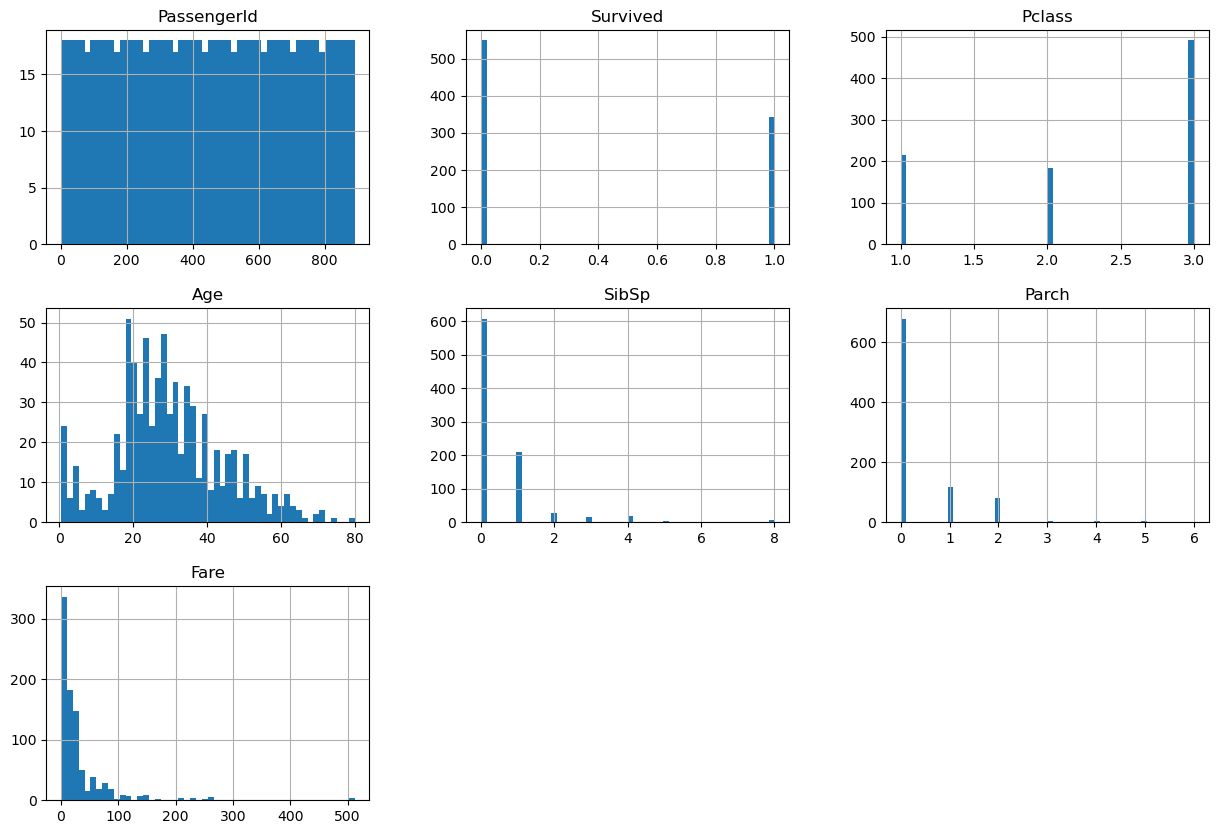

In [152]:
df.hist(figsize = (15,10), bins = 50);

Определим, сколько мужчин и сколько женщин находилось на борту

In [24]:
df["Sex"].value_counts()

male      577
female    314
Name: Sex, dtype: int64

Выведим распределение переменной Pclass по всем классам (социально-экономический статус) и это же распределение, только для
мужчин / женщин по отдельности.  

In [25]:
df["Pclass"].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [26]:
df[df["Sex"] == "female"]["Pclass"].value_counts()

3    144
1     94
2     76
Name: Pclass, dtype: int64

In [27]:
df[df["Sex"] == "male"]["Pclass"].value_counts()

3    347
1    122
2    108
Name: Pclass, dtype: int64

In [28]:
df[(df["Sex"] == "male") &(df["Pclass"] == 2)].count()[0]

108

In [55]:
df[(df["Fare"] >500)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C


Построим попарные зависимости признаков Age, Fare, Pclass, Sex, SibSp, Parch, Embarked и Survived

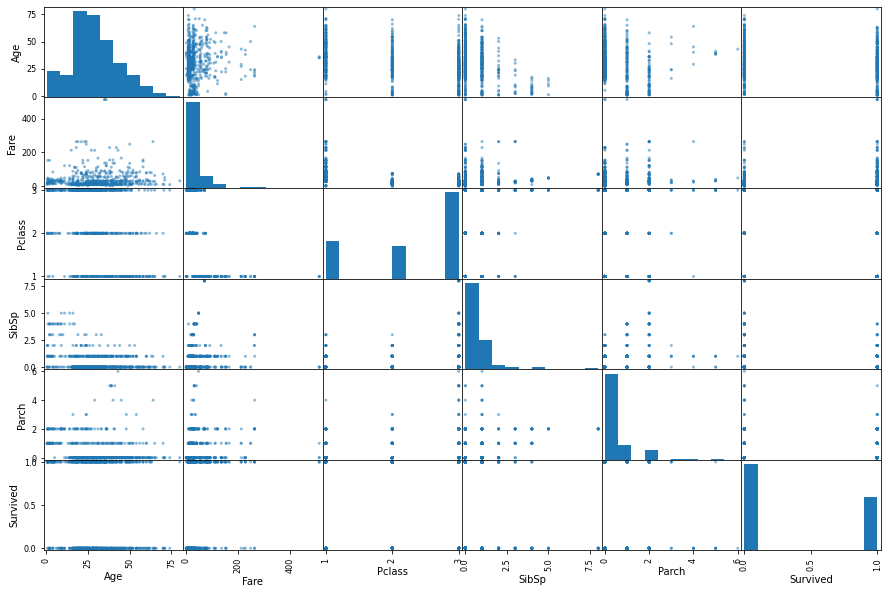

In [29]:
pd.plotting.scatter_matrix(df[["Age", "Fare", "Pclass", "Sex", "SibSp", "Parch", "Embarked", "Survived"]], figsize=(15,10));

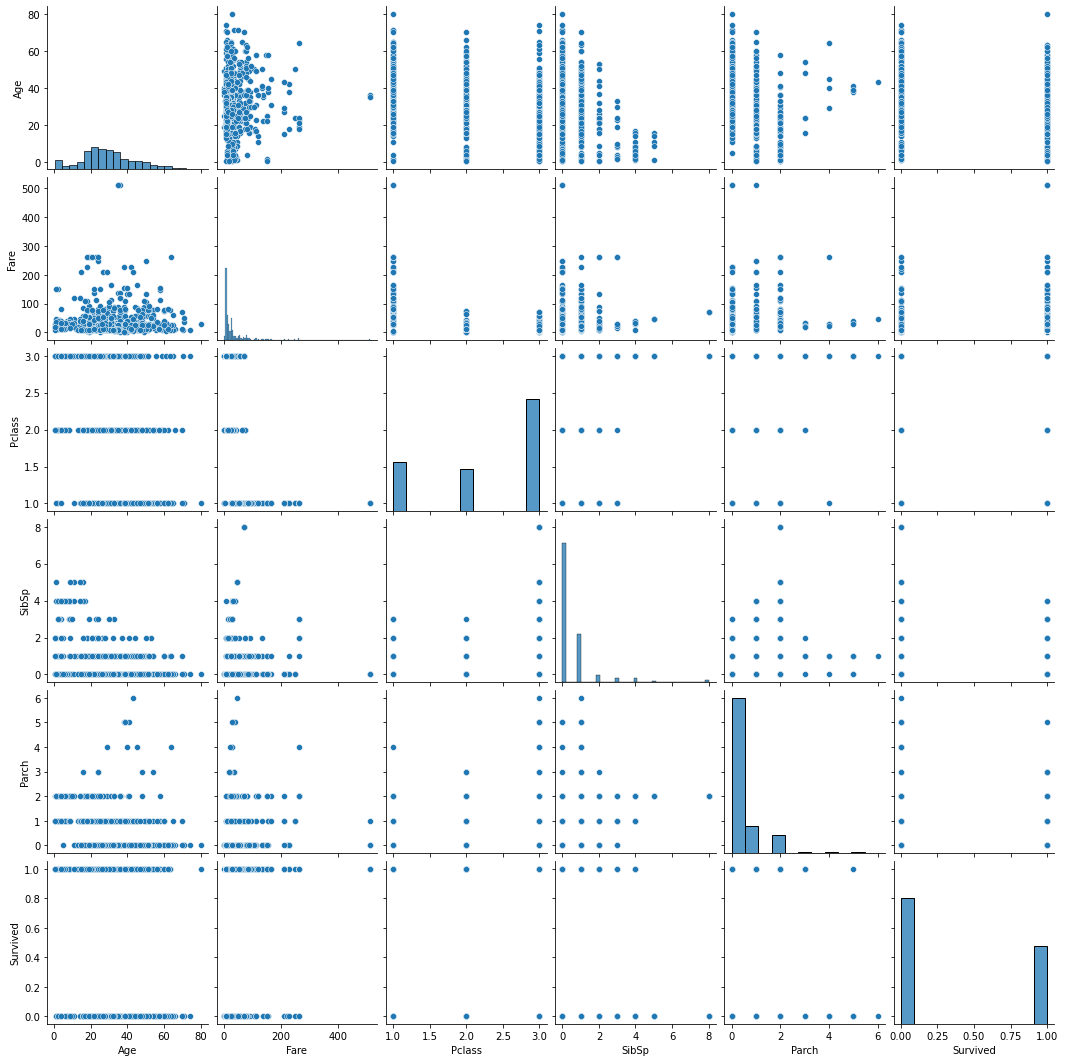

In [30]:
sns.pairplot(df[["Age", "Fare", "Pclass", "Sex", "SibSp", "Parch", "Embarked", "Survived"]])

Как плата за билет (Fare) зависит от класса каюты (Pclass)?

<Figure size 720x576 with 0 Axes>

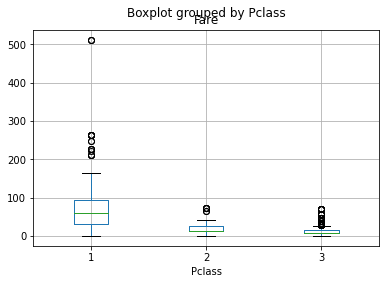

In [31]:
plt.figure(figsize=(10,8))
df.boxplot(column = "Fare", by = "Pclass");

<AxesSubplot:xlabel='Pclass', ylabel='Fare'>

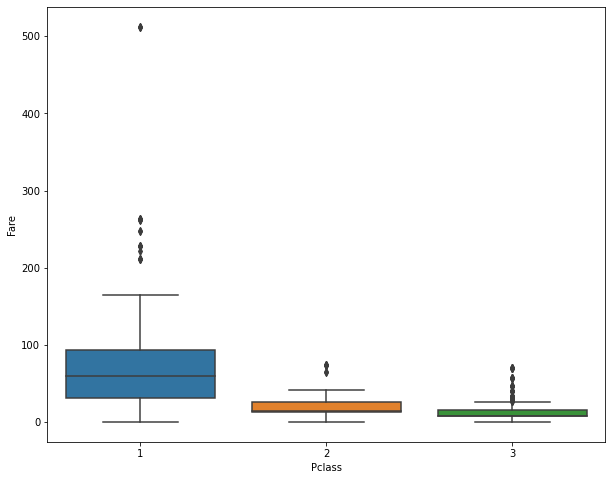

In [19]:
plt.figure(figsize=(10, 8))
sns.boxplot(x='Pclass', y='Fare', data = df)

Оценим, сколько всего пассажиров выжило на Титанике

<AxesSubplot:xlabel='Survived', ylabel='count'>

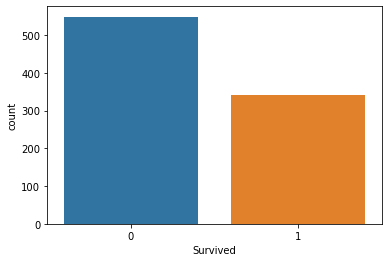

In [32]:
sns.countplot(x = 'Survived', data = df)

Влияет ли пол на выживаемость людей? Каково соотношение погибших и выживших в зависимости от пола?

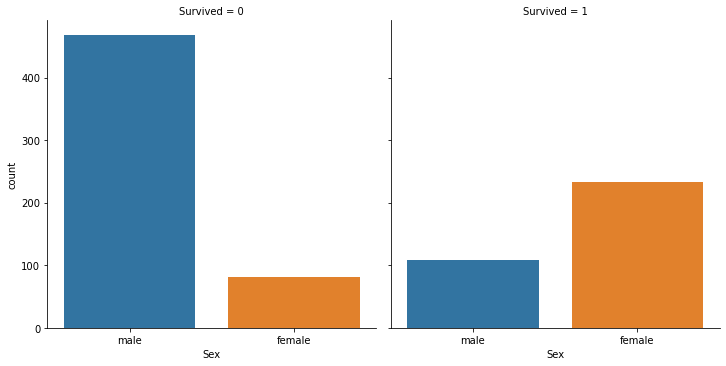

In [33]:
sns.catplot(x = 'Sex', col = 'Survived', kind = 'count', data = df)

<AxesSubplot:xlabel='Survived', ylabel='count'>

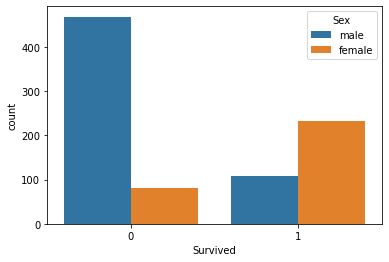

In [22]:
sns.countplot(data = df, x ="Survived", hue = "Sex")

Каково соотношение погибших и выживших в зависимости от класса каюты?

<AxesSubplot:xlabel='Survived', ylabel='count'>

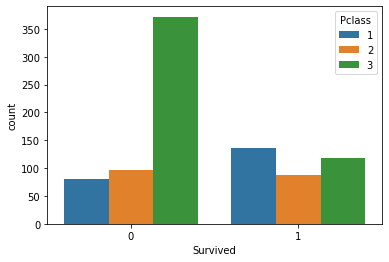

In [34]:
sns.countplot(data = df, x ="Survived", hue = "Pclass")

Как факт выживания зависит от возраста пассажира? Проверим (графически) предположение, что молодые чаще выживали. Пусть, условно, молодые - младше 30 лет, пожилые – старше 60 лет.


In [4]:
df['Age_categ'] = df['Age'].apply(lambda x: 1 if x <30 else 3 if x >60 else 2)

In [5]:
df.tail(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_categ
881,882,0,3,"Markun, Mr. Johann",male,33.0,0,0,349257,7.8958,NaN,S,2
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S,1
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S,1
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S,1
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q,2
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,2
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,1
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.7500,NaN,Q,2


<AxesSubplot:xlabel='Age_categ', ylabel='count'>

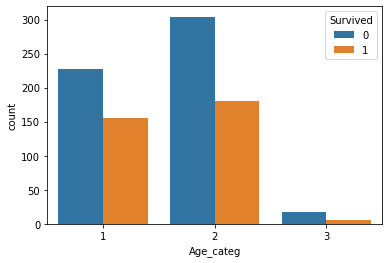

In [37]:
sns.countplot(x='Age_categ', hue='Survived', data=df)

In [39]:
df[df["Fare"]>300]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_categ
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C,2
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C,2
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C,2


In [40]:
corr = df.corr()

In [41]:
corr

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Age_categ
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658,0.032362
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,-0.051589
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500,-0.207478
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,0.836826
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651,-0.116500
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225,-0.118527
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000,0.056692
Age_categ,0.032362,-0.051589,-0.207478,0.836826,-0.116500,-0.118527,0.056692,1.000000


<AxesSubplot:>

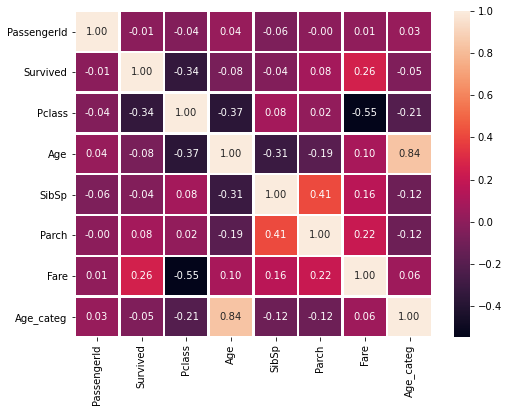

In [42]:
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot = True, linewidths=1.5 , fmt = '.2f')

### Предварительная обработка данных (preprocessing)

Какие действия выполняются в процессе предварительной подготовки?
- преобразование типов данных (в т.ч. преобразование категориальных признаков в набор фиктивных бинарных признаков)
- удаление выбросов
- заполнение пропусков
- нормализация (масштабирование) числовых признаков
- формирование дата-сета для обучения моделей (исключение признаков, объединение с фиктивными признаками и др.)

### Преобразование типов

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  Age_categ    891 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


In [77]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_categ
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S,2


In [5]:
d = {'male':0, 'female':1}
df['Sex']=df['Sex'].map(d)

In [46]:
# преобразование типов
# df['Age'] = df['Age'].astype('int64')

### Пропущенные значения

In [20]:
# сколько пропусков в дата-фрейме ?
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [56]:
for col in df.columns:
    print(f'Процент пропусков в колонке {col} = {df[col].isna().sum() / df.shape[0] * 100: .2f}')

Процент пропусков в колонке PassengerId =  0.00
Процент пропусков в колонке Survived =  0.00
Процент пропусков в колонке Pclass =  0.00
Процент пропусков в колонке Name =  0.00
Процент пропусков в колонке Sex =  0.00
Процент пропусков в колонке Age =  19.87
Процент пропусков в колонке SibSp =  0.00
Процент пропусков в колонке Parch =  0.00
Процент пропусков в колонке Ticket =  0.00
Процент пропусков в колонке Fare =  0.00
Процент пропусков в колонке Cabin =  77.10
Процент пропусков в колонке Embarked =  0.22


In [57]:
for col in df.columns:
    print('Кол-во пропусков в колонке %s = %d' % (col, df[col].isna().sum()))

Кол-во пропусков в колонке PassengerId = 0
Кол-во пропусков в колонке Survived = 0
Кол-во пропусков в колонке Pclass = 0
Кол-во пропусков в колонке Name = 0
Кол-во пропусков в колонке Sex = 0
Кол-во пропусков в колонке Age = 177
Кол-во пропусков в колонке SibSp = 0
Кол-во пропусков в колонке Parch = 0
Кол-во пропусков в колонке Ticket = 0
Кол-во пропусков в колонке Fare = 0
Кол-во пропусков в колонке Cabin = 687
Кол-во пропусков в колонке Embarked = 2


<Axes: >

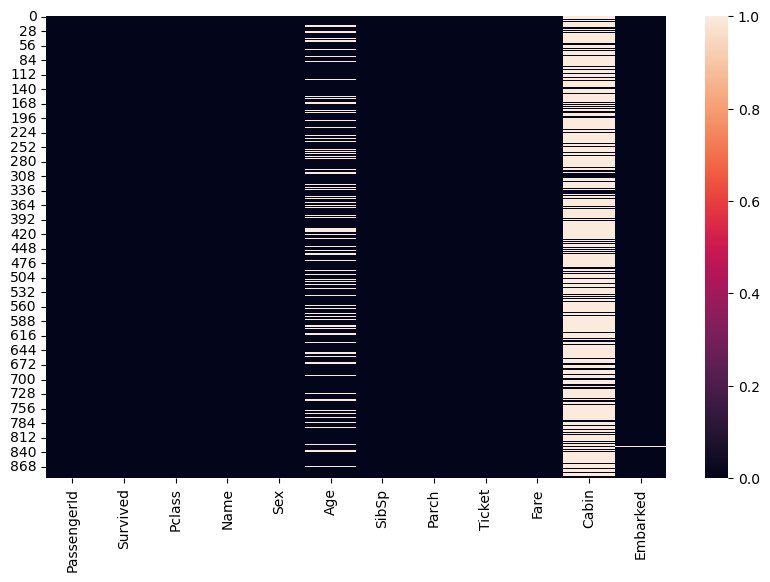

In [58]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isna())

In [7]:
# Удалим переменную Cabin (номер каюты)
df.drop(columns = 'Cabin', axis = 1, inplace = True)

In [9]:
# Заменим пустые значения в признаке Age (возраст) медианой
df['Age']=df['Age'].fillna(df['Age'].median())

In [11]:
# Определяеи наиболее часто встречающее значение в Embarked
embarked_col = df.Embarked.dropna().mode()[0]
embarked_col

'S'

In [55]:
# Удалим пустые строки в Embarked
# df.dropna(inplace = True)

In [13]:
df['Embarked'] = df['Embarked'].fillna(embarked_col)

<Axes: >

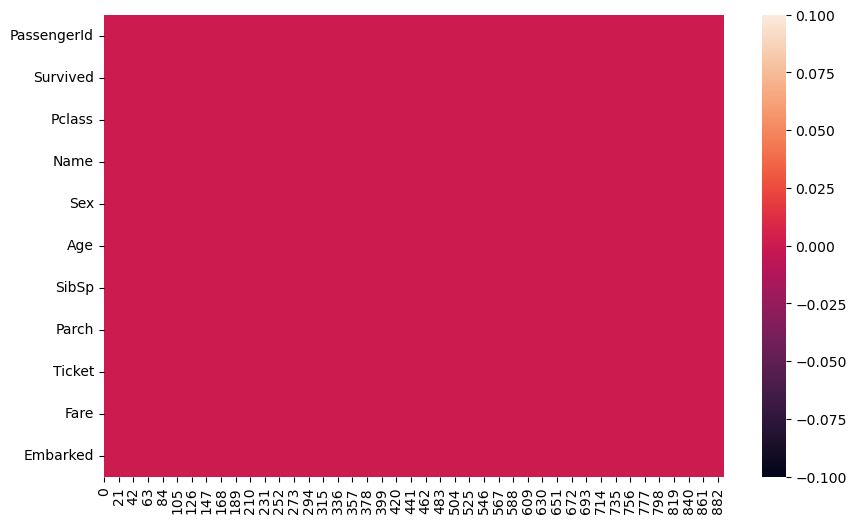

In [15]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isna().transpose())

In [64]:
df.shape

(891, 11)

### Преобразование небинарных категориальных признаков в набор фиктивных бинарных

In [17]:
# генерация бинарных колонок (фиктивных переменных) для категориального признака Embarked
embarked_cols = pd.get_dummies(df["Embarked"], dtype=int)
embarked_cols.head()

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


### Формирование дата-сета для обучения моделей

In [46]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,28.0,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",0,26.0,0,0,111369,30.0000,C


In [19]:
# список имён признаков, которые будут использоваться для построения модели
features_names = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']

In [21]:
X = pd.concat([df[features_names], embarked_cols], axis = 1)

In [23]:
# выделение целевой переменной (таргета) в отдельный вектор
y = df["Survived"]

In [25]:
X

,Pclass,Sex,Age,SibSp,Parch,Fare,C,Q,S
0,3,0,22.0,1,0,7.2500,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,0
2,3,1,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,3,0,35.0,0,0,8.0500,0,0,1
...,...,...,...,...,...,...,...,...,...
886,2,0,27.0,0,0,13.0000,0,0,1
887,1,1,19.0,0,0,30.0000,0,0,1
888,3,1,28.0,1,2,23.4500,0,0,1
889,1,0,26.0,0,0,30.0000,1,0,0


### Обучение моделей (models fitting)

In [27]:
# Разделяем выборку на обучающую и тестовую 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [29]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(596, 9) (295, 9) (596,) (295,)


### Метод k-ближайших соседей

In [31]:
from sklearn.neighbors import KNeighborsClassifier

In [33]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

### Прогнозирование (prediction)

In [35]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [37]:
knn_predict = knn.predict(X_test)

In [39]:
knn_predict2 = knn.predict(X_train)

In [120]:
knn_accuracy = accuracy_score(knn_predict, y_test)
knn_accuracy

0.7186440677966102

In [43]:
accuracy_score(knn_predict2, y_train)

0.7869127516778524

In [45]:
confusion_matrix(knn_predict, y_test)

array([[143,  51],
       [ 32,  69]], dtype=int64)

In [47]:
print(classification_report(knn_predict, y_test))

              precision    recall  f1-score   support

           0       0.82      0.74      0.78       194
           1       0.57      0.68      0.62       101

    accuracy                           0.72       295
   macro avg       0.70      0.71      0.70       295
weighted avg       0.73      0.72      0.72       295



In [49]:
knn_predict[:10]

array([0, 0, 0, 1, 0, 1, 1, 0, 1, 1], dtype=int64)

In [53]:
np.array(y_test[:10])

array([1, 0, 0, 1, 1, 1, 1, 0, 1, 1], dtype=int64)

In [56]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

### Логистическая регрессия

In [63]:
lrn = LogisticRegression(max_iter=500)
lrn.fit(X_train, y_train)

LogisticRegression(max_iter=500)

Веса модели хранятся в атрибутах coef_ и intercept_.

__coef___ содержит веса для каждого признака (для каждого класса в случае многоклассовой классификации).

__intercept___ содержит свободный член (bias).

In [156]:
lrn.intercept_

array([1.56311969])

In [158]:
lrn.coef_

array([[-0.85261051,  2.44857807, -0.02765082, -0.2665949 , -0.08918885,
         0.00287044,  0.30245108,  0.02103449, -0.34012274]])

In [65]:
lrn_predict = lrn.predict(X_test)

In [67]:
lrn_accuracy = accuracy_score(lrn_predict, y_test)
lrn_accuracy

0.8135593220338984

In [69]:
confusion_matrix(lrn_predict, y_test)

array([[153,  33],
       [ 22,  87]], dtype=int64)

In [71]:
print(classification_report(lrn_predict, y_test))

              precision    recall  f1-score   support

           0       0.87      0.82      0.85       186
           1       0.72      0.80      0.76       109

    accuracy                           0.81       295
   macro avg       0.80      0.81      0.80       295
weighted avg       0.82      0.81      0.82       295



### Классификатор дерева решений

In [85]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

DecisionTreeClassifier()

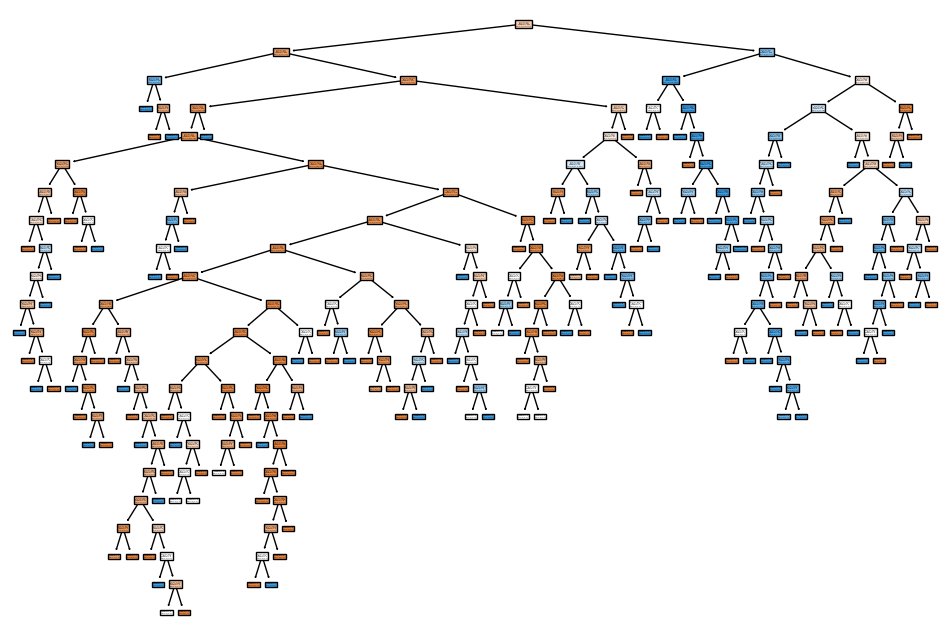

In [173]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

dtc2 = DecisionTreeClassifier()
dtc2.fit(X_train, y_train)
plt.figure(figsize=(12, 8))
plot_tree(dtc2, feature_names=None, 
          class_names=None, filled=True)
plt.show()

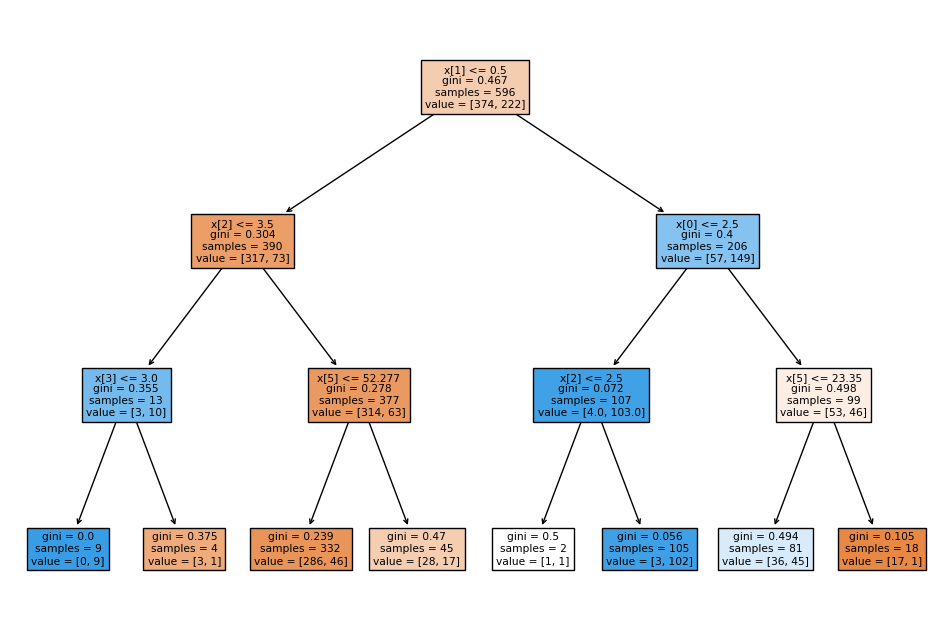

In [185]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

dtc2 = DecisionTreeClassifier(max_depth=3)
dtc2.fit(X_train, y_train)
plt.figure(figsize=(12, 8))
plot_tree(dtc2,  filled=True)
plt.show()

In [87]:
dtc_predict = dtc.predict(X_test)

In [89]:
dtc_accuracy = accuracy_score(dtc_predict, y_test)
dtc_accuracy

0.7457627118644068

In [91]:
confusion_matrix(dtc_predict, y_test)

array([[136,  36],
       [ 39,  84]], dtype=int64)

In [93]:
print(classification_report(dtc_predict, y_test))

              precision    recall  f1-score   support

           0       0.78      0.79      0.78       172
           1       0.70      0.68      0.69       123

    accuracy                           0.75       295
   macro avg       0.74      0.74      0.74       295
weighted avg       0.74      0.75      0.75       295



### RandomForestClassifier

In [74]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [76]:
rfc_predict = rfc.predict(X_test)

In [78]:
rfc_accuracy = accuracy_score(rfc_predict, y_test)
rfc_accuracy

0.7728813559322034

In [80]:
confusion_matrix(rfc_predict, y_test)

array([[144,  36],
       [ 31,  84]], dtype=int64)

In [82]:
print(classification_report(rfc_predict, y_test))

              precision    recall  f1-score   support

           0       0.82      0.80      0.81       180
           1       0.70      0.73      0.71       115

    accuracy                           0.77       295
   macro avg       0.76      0.77      0.76       295
weighted avg       0.77      0.77      0.77       295



### Наивный байесовский классификатор

In [96]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [98]:
gnb_predict = gnb.predict(X_test)

In [100]:
gnb_accuracy = accuracy_score(gnb_predict, y_test)
gnb_accuracy

0.7864406779661017

In [102]:
confusion_matrix(gnb_predict, y_test)

array([[141,  29],
       [ 34,  91]], dtype=int64)

In [104]:
print(classification_report(gnb_predict, y_test))

              precision    recall  f1-score   support

           0       0.81      0.83      0.82       170
           1       0.76      0.73      0.74       125

    accuracy                           0.79       295
   macro avg       0.78      0.78      0.78       295
weighted avg       0.79      0.79      0.79       295



### Метод опорных векторов

In [107]:
svc = SVC()
svc.fit(X_train, y_train)

SVC()

In [109]:
svc_predict = svc.predict(X_test)

In [111]:
svc_accuracy = accuracy_score(svc_predict, y_test)
svc_accuracy

0.6644067796610169

In [113]:
confusion_matrix(svc_predict, y_test)

array([[164,  88],
       [ 11,  32]], dtype=int64)

In [115]:
print(classification_report(svc_predict, y_test))

              precision    recall  f1-score   support

           0       0.94      0.65      0.77       252
           1       0.27      0.74      0.39        43

    accuracy                           0.66       295
   macro avg       0.60      0.70      0.58       295
weighted avg       0.84      0.66      0.71       295



### Сравнение моделей

In [122]:
classifiers =["KNeighborsClassifier", "SVC","Gaussian Naive Bayes", "DecisionTreeClassifier", "Random Forest Classifier", "Logistic Regression"]

log_cols = ["Classifier", "Accuracy"]
log = pd.DataFrame(columns=log_cols)

log["Classifier"] = classifiers
log["Accuracy"] = [knn_accuracy, svc_accuracy, gnb_accuracy, dtc_accuracy, rfc_accuracy, lrn_accuracy]

In [124]:
log

,Classifier,Accuracy
0,KNeighborsClassifier,0.718644
1,SVC,0.664407
2,Gaussian Naive Bayes,0.786441
3,DecisionTreeClassifier,0.745763
4,Random Forest Classifier,0.772881
5,Logistic Regression,0.813559


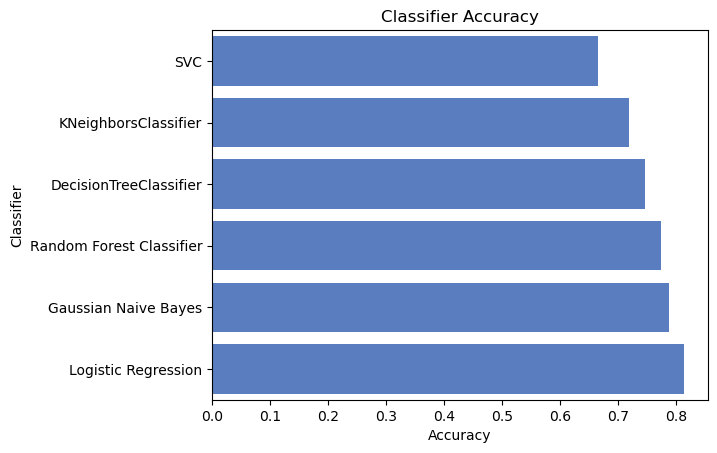

In [126]:
plt.xlabel('Accuracy')
plt.title('Classifier Accuracy')

sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=log.sort_values(by='Accuracy'), color="b");